## Assignment week 05: Sleeping habits

Welcome to **week five** of this course programming 1. You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. Learning outcomes:


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 


---

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [121]:
###IMPORTS###
import pandas as pd 
import Helper 
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from bokeh.plotting import figure, show, output_notebook

In [122]:
#Load Data
#config = Helper.get_config() ###cant figure this out
#df = pd.read_csv(config['sleep.csv'])
df = pd.read_csv('C:/Users/Gebruiker/Documents/School/Programming1/programming1/data/sleep.csv' )

df.head()

Enough  Hours PhoneReach PhoneTime  Tired Breakfast
0    Yes    8.0        Yes       Yes      3       Yes
1     No    6.0        Yes       Yes      3        No
2    Yes    6.0        Yes       Yes      2       Yes
3     No    7.0        Yes       Yes      4        No
4     No    7.0        Yes       Yes      2       Yes

In [123]:
#code printing percentage missing data

total_missing_data = df.isna().sum()

hours_missing_data = df.Hours.isna().sum()

df_total = len(df)

percentage_missing = (hours_missing_data / df_total) * 100

answer = str(round(percentage_missing, 2))

print("The percentage missing data in the column Hours is:", answer)

#drop missing values
df = df.dropna()
df.head()

The percentage missing data in the column Hours is: 1.92


Enough  Hours PhoneReach PhoneTime  Tired Breakfast
0    Yes    8.0        Yes       Yes      3       Yes
1     No    6.0        Yes       Yes      3        No
2    Yes    6.0        Yes       Yes      2       Yes
3     No    7.0        Yes       Yes      4        No
4     No    7.0        Yes       Yes      2       Yes

<span style="color:blue"> By using the *df.isna().sum()* we can see that there are some missing data in the column 'Hours'. Dividing this with the total data in the dataframe, we can calculate the percentage missing data. Every other column doesn't have missing data. </span>

In [124]:
#code printing answer dependent and independent variables
dependent_variables = df['Hours']
independent_variables = df.drop(['Hours'], axis = 1)
print("Column with dependent variables:", "\n", dependent_variables, "\n")

print("Columns with independent_variables:", "\n", independent_variables)

Column with dependent variables: 
 0      8.0
1      6.0
2      6.0
3      7.0
4      7.0
      ... 
99     7.0
100    7.0
101    8.0
102    7.0
103    6.0
Name: Hours, Length: 102, dtype: float64 

Columns with independent_variables: 
     Enough PhoneReach PhoneTime  Tired Breakfast
0      Yes        Yes       Yes      3       Yes
1       No        Yes       Yes      3        No
2      Yes        Yes       Yes      2       Yes
3       No        Yes       Yes      4        No
4       No        Yes       Yes      2       Yes
..     ...        ...       ...    ...       ...
99      No        Yes       Yes      2       Yes
100     No         No       Yes      3       Yes
101    Yes        Yes       Yes      3       Yes
102    Yes        Yes       Yes      2       Yes
103    Yes        Yes       Yes      3       Yes

[102 rows x 5 columns]


<span style="color:blue"> The reason why the variables in the Hours column is considered as dependent is because they are a an average of hours in a week. In order to get the variables, you will have to consider the amount of hours slept daily and sum that up to get a weekly average. <br/>
    All the other variables in the dataframe can be considered as independent variables. </span>

In [125]:
#code printing answer about datatypes
dftype_before = df.dtypes

#make yes=1 and no=1
df['Enough'] = df.Enough.map(dict(Yes=1, No=0))
df['PhoneReach'] = df.PhoneReach.map(dict(Yes=1, No=0))
df['PhoneTime'] = df.PhoneTime.map(dict(Yes=1, No=0))
df['Breakfast'] = df.Breakfast.map(dict(Yes=1, No=0))

dftype_after = df.dtypes
print("Data types before:", "\n", dftype_before, "\n")
print("Data type after modification:", "\n", dftype_after)

Data types before: 
 Enough         object
Hours         float64
PhoneReach     object
PhoneTime      object
Tired           int64
Breakfast      object
dtype: object 

Data type after modification: 
 Enough          int64
Hours         float64
PhoneReach      int64
PhoneTime       int64
Tired           int64
Breakfast       int64
dtype: object


<span style="color:blue"> Using *df.dtypes* we can get the datatypes for each column. The columns with variables "yes/no" are objects. In order for the computer to understand what a 'yes or no' means, it would be easier to change it to 1 and 0. In this case, all the 'Yes' will become 1 and 'No' will become 0. Therefore, the new datatypes for these columns will become integers. </span>

In [96]:
#dataframe now
df.head()

Enough  Hours  PhoneReach  PhoneTime  Tired  Breakfast
0       1    8.0           1          1      3          1
1       0    6.0           1          1      3          0
2       1    6.0           1          1      2          1
3       0    7.0           1          1      4          0
4       0    7.0           1          1      2          1

---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are ballanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations amongs the variables?


<ul>
<li>Create some meaningful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

In [97]:
#code your answer to the value counts and distribution plots here

#count value for each column and sort the index for the tiredness scale)
for column in df:
    amount = df[column].value_counts().sort_index()
    print(amount, "\n")


0    67
1    35
Name: Enough, dtype: int64 

2.0      2
4.0      4
5.0     12
6.0     24
7.0     35
8.0     16
9.0      8
10.0     1
Name: Hours, dtype: int64 

0    31
1    71
Name: PhoneReach, dtype: int64 

0    19
1    83
Name: PhoneTime, dtype: int64 

1     4
2    26
3    39
4    23
5    10
Name: Tired, dtype: int64 

0    41
1    61
Name: Breakfast, dtype: int64 



<Figure size 432x288 with 0 Axes>

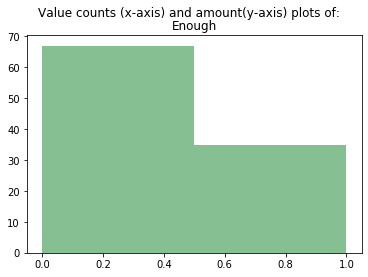

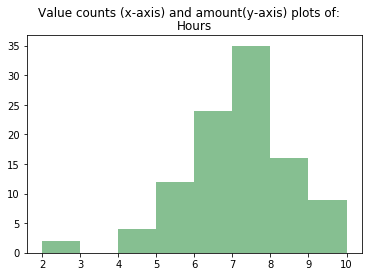

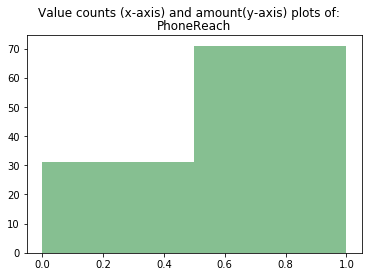

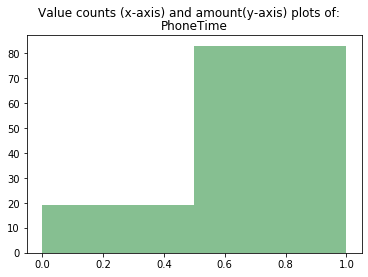

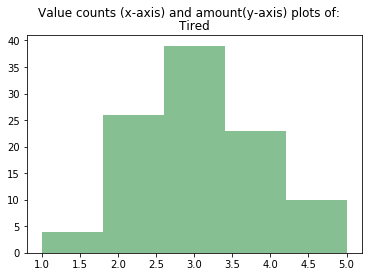

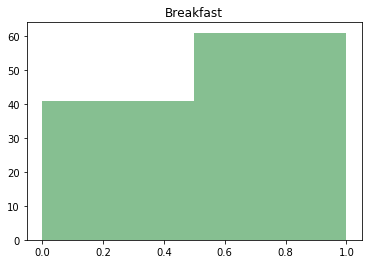

In [98]:
#plot distrubition of each values

for column in df:
    pl.suptitle("Value counts (x-axis) and amount(y-axis) plots of:")
    binsize = len(df[column].value_counts()) #customize bin size
    histogram = df.hist(column=column, grid=False, color='#86bf91', bins=binsize)
   

<span style="color:blue"> Shown above is an overview of how many people answered yes or no for different questions (Yes = 1 and No = 0), amount slept and the scale based on their tiredness. <br/>
    *Phone Reach*<br/>
    We can see that a majority of individuals sleeps with their phone within an arm's reach.<br/>
    *Phone Time*<br/>
    Also a majortiy uses their phone 30 minutes before falling asleep. <br/>
    *Tired*<br/>
    This also shows that the majority feels like they don't get enough sleep. Eventhough the average do sleep >8 hours.  </span>

In [99]:
#code for the scatter plot here
from bokeh.io import output_notebook 

#to show the plot here
output_notebook()

#set color for Breakfast
colormap = {1: 'green',0: 'red'}
colors = [colormap[x] for x in df['Breakfast']]

#create scatter plot
p = figure(title = "Relation between tiredness and hours of sleep")
p.xaxis.axis_label = "Hours slept"
p.yaxis.axis_label = "Tiredness (1: not tired, 5: very tired)"
p.scatter(df.Hours, df.Tired, color=colors, fill_alpha=0.4, size=10)
show(p)


Loading BokehJS ...

<span style="color:blue"> Above we see a scatter plot with the relation between hours slept and tiredness. The red dot means that the person didn't have breakfast and the green dot means that the person did. 
    Some people slept for the same amount of hours and also felt the same amount of tiredness. However, they did not all eat breakfast which is why the combination of the red and green dot becomes yellow.
    Also, there is a green dot (= ate breakfast) where someone slept for a very short time and still did not feel tired.
    Finally, we can also note that a big portion of people felt very tired no matter the amount of hours they slept. 
   

In [100]:
#code your answer to the target statistics here

#average of tiredness scale and hours slept
print("The mean for hours slept:","\n", df.Hours.mean(), "\n")
print("The mean for tiredness scale:","\n", df.Tired.mean(), "\n")

#percentage saying yes for other columns
other_columns = df[['Breakfast','PhoneTime','PhoneReach','Enough']]
for column in other_columns:
    amount_yes = len(df[df[column] == 1])
    divisor = len(df[column])
    percentage = (amount_yes / divisor)*100
    print(column, "percentage yes: {:.2f}%".format(percentage),  "\n")
    
#standard deviation 
df.describe()

The mean for hours slept: 
 6.6568627450980395 

The mean for tiredness scale: 
 3.088235294117647 

Breakfast percentage yes: 59.80% 

PhoneTime percentage yes: 81.37% 

PhoneReach percentage yes: 69.61% 

Enough percentage yes: 34.31% 



Enough       Hours  PhoneReach   PhoneTime       Tired   Breakfast
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000
mean     0.343137    6.656863    0.696078    0.813725    3.088235    0.598039
std      0.477101    1.417676    0.462221    0.391251    1.015747    0.492715
min      0.000000    2.000000    0.000000    0.000000    1.000000    0.000000
25%      0.000000    6.000000    0.000000    1.000000    2.000000    0.000000
50%      0.000000    7.000000    1.000000    1.000000    3.000000    1.000000
75%      1.000000    7.000000    1.000000    1.000000    4.000000    1.000000
max      1.000000   10.000000    1.000000    1.000000    5.000000    1.000000

In [101]:
#code your answer for the heatmap here and briefly state your finding

#create correlation matrix
correlate = df.corr().abs()
y_range = (list(reversed(correlate.columns)))
x_range = (list(correlate.index))

#reshape and transfer to ColumnDataSource object
dfc = pd.DataFrame(correlate.stack(), columns=['r']).reset_index()

from bokeh.models import ColumnDataSource
source = ColumnDataSource(dfc)

#plot heatmap
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter,)
from bokeh.transform import transform
from bokeh.palettes import Viridis256

#create colormapper 
mapper = LinearColorMapper(palette=Viridis256, low=dfc.r.min(), high=dfc.r.max())

#create plot
p = figure(title="correlation heatmap", plot_width=500, plot_height=450,
           x_range=x_range, y_range=y_range, x_axis_location="above", toolbar_location=None)

#use mapper to fill the rectangles in the plot
p.rect(x="level_0", y="level_1", width=1, height=1, source=source,
       line_color=None, fill_color=transform('r', mapper))

#create and add colorbar to the right
color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(x_range)), 
                     formatter=PrintfTickFormatter(format="%.1f"))
p.add_layout(color_bar, 'right')

#draw axis
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

#show
show(p)

<span style="color:blue">From the heatmap above we can see that there is some correlation between the hours slept and whether the patients thought they slept enough. Also, there is some correlation between the tiredness scale and whether the patients thought they slept enough. But for the other variables there were almost no correlation at all (the heatmap had a darker shade).

---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [102]:
import scipy.special
from scipy.stats import norm
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
from bokeh.models import Span

def make_plot(title, hist, edges, x, rv, mu_dependent, robuust_dependent):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    p.line(x, rv, line_color="#ff8888", line_width=4, alpha=0.7)

    #vertical line
    vline1 = Span(location=mu_dependent, dimension='height', line_color='red', line_width=3)
    p.add_layout(vline1)
    vline2 = Span(location=robuust_dependent, dimension='height', line_color='green', line_width=3, )
    p.add_layout(vline2)
    #labels     
    p.xaxis.axis_label = 'Hours slept'
    p.yaxis.axis_label = 'Amount'
    p.grid.grid_line_color="white"
    return p

#normal distribution line
x = np.linspace(0, 12, 1000)
hist, edges = np.histogram(df['Hours'], density=True)
mu_dependent = df.Hours.mean()
robuust_dependent = df.Hours.median()
sigma_MM = np.std(df.Hours)
rv = np.array([norm.pdf(xi, loc = mu_dependent, scale = sigma_MM) for xi in x])


p1 = make_plot("Normal Distribution of hours slept (μ=6.7, σ=7)", hist, edges, x, rv, mu_dependent, robuust_dependent)

show(p1)

<span style="color:blue">From the graph above we can see that the data is still overal pretty symmetrical distributed. Also, the mean (red line) is smaller than the robuust estimation (green line). 
We can also see that the data is normally distributed (pink graph).
   

<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homoegeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

In [147]:
from Helper import * 

b = Helper.Boxplot(df = df[['Hours', 'Breakfast']], 
                   value = 'Hours', by = 'Breakfast')
p = b.boxplot()
show(p)



In [126]:
from scipy.stats import levene, bartlett

#function to calculate levene & bartlett
def levene_barlett(a, b):
    stat, p = levene(df[a], df[b])    
    stat, q = bartlett(df[a], df[b])
    print("Levene:", p,"Bartlett:", q,"\n")


# enough_hours = levene_barlett('Enough', 'Hours')
# enough_phonereach = levene_barlett('Enough', 'PhoneReach')
# enough_phonetime = levene_barlett('Enough', 'PhoneTime')
# enough_tired = levene_barlett('Enough', 'Tired')
# enough_hours = levene_barlett('Enough', 'Hours')
# enough_phonereach = levene_barlett('Enough', 'PhoneReach') #etc
#needed to answer the research questions
hours_breakfast = levene_barlett('Hours', 'Breakfast')
hours_tired = levene_barlett('Hours', 'Tired')

print(hours_breakfast, hours_tired)


Levene: 8.68359363832178e-08 Bartlett: 1.1337119413275433e-22 

Levene: 0.02573520664256973 Bartlett: 0.000925972863551918 

None None


<span style="color:blue"> A small p-value suggests that the variables doesn't have equal variances. This means that the data sets are unbalanced. 

---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

In [127]:
#make categories for Tiredness
categories = {1: 'No', 2: 'No' , 3 : 'Maybe',  4 : 'Yes', 5 : 'Yes'}
df['Tired'] = df.Tired.map(categories)

df['Tired']

0      Maybe
1      Maybe
2         No
3        Yes
4         No
       ...  
99        No
100    Maybe
101    Maybe
102       No
103    Maybe
Name: Tired, Length: 102, dtype: object

<span style="color:blue">The data that is necessarry for answering the research question, is the Breakfast, Hours and Tiredness score. That's why a data frame was made using only these data.

In [132]:
#Merge necessary columns
df1 = df.copy()
df1['Breakfast'] = df.Breakfast.map({1:'Yes', 0:'No'})
df1 = df1[['Breakfast', 'Hours', 'Tired']]
df1['Breakfast_Tired'] = df1['Breakfast'] + "_" + df1['Tired']
df1

Breakfast  Hours  Tired Breakfast_Tired
0         Yes    8.0  Maybe       Yes_Maybe
1          No    6.0  Maybe        No_Maybe
2         Yes    6.0     No          Yes_No
3          No    7.0    Yes          No_Yes
4         Yes    7.0     No          Yes_No
..        ...    ...    ...             ...
99        Yes    7.0     No          Yes_No
100       Yes    7.0  Maybe       Yes_Maybe
101       Yes    8.0  Maybe       Yes_Maybe
102       Yes    7.0     No          Yes_No
103       Yes    6.0  Maybe       Yes_Maybe

[102 rows x 4 columns]

In [142]:
#Group by the breakfast_tired and count this based on the Hours column 
grouped_df = df1.groupby(['Breakfast','Tired'])['Hours', 'Breakfast_Tired']
grouped_count = grouped_df.count()
grouped_count.head()

Hours  Breakfast_Tired
Breakfast Tired                        
No        Maybe     15               15
          No         8                8
          Yes       18               18
Yes       Maybe     24               24
          No        22               22

<span style="color:blue"> From the results above we can see that for some sample group there are more samples than others. In order to do an ANOVA test, the sample size needs to be equal. 

In [143]:
#make dataframe to equal samplesize and remove unnecessary column 'level_2'
test_sample = grouped_df.apply(lambda x: x.sample(n = 8)).reset_index().drop(['level_2'], axis =1)

test_sample

Breakfast  Tired  Hours Breakfast_Tired
0         No  Maybe    6.0        No_Maybe
1         No  Maybe    8.0        No_Maybe
2         No  Maybe    6.0        No_Maybe
3         No  Maybe    7.0        No_Maybe
4         No  Maybe    6.0        No_Maybe
5         No  Maybe    5.0        No_Maybe
6         No  Maybe    6.0        No_Maybe
7         No  Maybe    7.0        No_Maybe
8         No     No    7.0           No_No
9         No     No    8.0           No_No
10        No     No    7.0           No_No
11        No     No    7.0           No_No
12        No     No    5.0           No_No
13        No     No    5.0           No_No
14        No     No    6.0           No_No
15        No     No    7.0           No_No
16        No    Yes    8.0          No_Yes
17        No    Yes    6.0          No_Yes
18        No    Yes    2.0          No_Yes
19        No    Yes    5.0          No_Yes
20        No    Yes    7.0          No_Yes
21        No    Yes    7.0          No_Yes
22        No    Yes    7.0          No_Yes
23        No    Yes    4.0          No_Yes
24       Yes  Maybe    8.0       Yes_Maybe
25       Yes  Maybe    6.0       Yes_Maybe
26       Yes  Maybe    7.0       Yes_Maybe
27       Yes  Maybe    7.0       Yes_Maybe
28       Yes  Maybe    6.0       Yes_Maybe
29       Yes  Maybe    7.0       Yes_Maybe
30       Yes  Maybe    8.0       Yes_Maybe
31       Yes  Maybe    9.0       Yes_Maybe
32       Yes     No    8.0          Yes_No
33       Yes     No    7.0          Yes_No
34       Yes     No    6.0          Yes_No
35       Yes     No    7.0          Yes_No
36       Yes     No    7.0          Yes_No
37       Yes     No    7.0          Yes_No
38       Yes     No    7.0          Yes_No
39       Yes     No    7.0          Yes_No
40       Yes    Yes    6.0         Yes_Yes
41       Yes    Yes    6.0         Yes_Yes
42       Yes    Yes    9.0         Yes_Yes
43       Yes    Yes    7.0         Yes_Yes
44       Yes    Yes    6.0         Yes_Yes
45       Yes    Yes    5.0         Yes_Yes
46       Yes    Yes    7.0         Yes_Yes
47       Yes    Yes    7.0         Yes_Yes

---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use one-way ANOVA for research question 1</li>
    <li>Use two-way ANOVA for research question 2</li>
    <li>https://reneshbedre.github.io/blog/anova.html</li>
</ul>
</details>

In [148]:
#one-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Hours ~ C(Breakfast)', data=test_sample).fit()
anova_table1 = sm.stats.anova_lm(model, typ=2)
anova_table1

sum_sq    df         F    PR(>F)
C(Breakfast)   6.750000   1.0  4.783055  0.033863
Residual      64.916667  46.0       NaN       NaN

In [149]:
model = ols('Hours ~ C(Breakfast) + C(Tired)', data=test_sample).fit()
anova_table2 = sm.stats.anova_lm(model, typ=2)
anova_table2

sum_sq    df         F    PR(>F)
C(Breakfast)   6.750000   1.0  4.858896  0.032780
C(Tired)       3.791667   2.0  1.364690  0.266059
Residual      61.125000  44.0       NaN       NaN

<span style="color:blue"> To answer the first research question whether there is a difference in hours slept by having breakfast, we can see that the p-value is < 0.05 which means that there is a significance difference between the hours slept when having breakfast.
For the second research question we can see that the p-value for tiredness vs. hours slept is >0.05  which means having breakfast and the tiredness does not influence the hours slept. </span>

---

<a name='5'></a>
## Part 6: Enhanced plotting (20 pt)

Create a panel with 1) your dataframe with equal samplesize 2) a picture of a sleeping beauty, 3) the scatter plot of tired / hours of sleep with different colors for Breakfast from part 2 4) the boxplots given the p-value for the anova outcome in the title

In [ ]:
#your solution here